In [1]:
from sample_random_multests import *
from plots import *
from adjustment_main import *
import matplotlib.ticker as mtick

In [2]:
methods = ['Bonferroni', 'Holm', 'BHY']

std_mult_space = [0.5, 1, 1.5, 5, 25]
sharpe_ratios = np.linspace(0.2,1.1, 10)
crosssec_rho=0
autocorrelation=0

for num_test in [10, 50, 200]:

	std_results = []
	for std_idx, std_mult in enumerate(std_mult_space):
		print(f'Running {std_idx+1}/{len(std_mult_space)}', end='\r')
		
		results = []

		for idx, sr in enumerate(sharpe_ratios):
			res = Haircut_SR(sample_freq=3, num_obs=240, SR=sr,
							is_annualised=True,
							is_autocorrelated=False,
							autocorrelation=autocorrelation,
							num_test=num_test,
							crosssec_rho=crosssec_rho,
							sample_dist='gamma',
							std_scale=std_mult,
							num_simulations=2000)
			results.append(res)
		results = np.array(results)
		std_results.append(results)


	gamma_plots(std_results, std_mult_space, sharpe_ratios, 
	    crosssec_rho=crosssec_rho, autocorrelation=autocorrelation, num_test=num_test)


<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

mean = 1.00, std = 0.50, median = 0.92
mean = 0.99, std = 1.00, median = 0.68
mean = 1.01, std = 1.51, median = 0.42
mean = 0.98, std = 2.00, median = 0.17


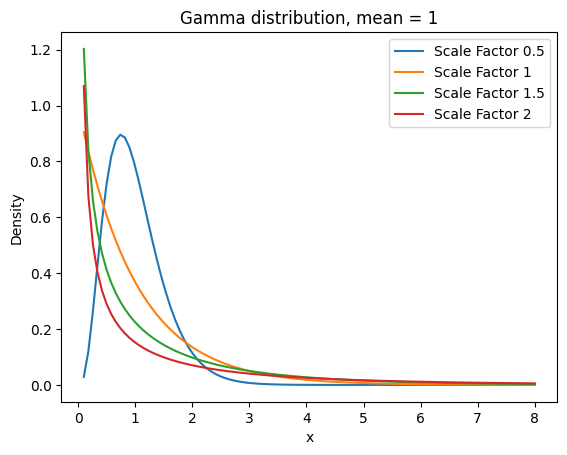

In [3]:
scale = 1
from scipy import stats

x = np.linspace (0.1, 8, 100) 
fig, ax = plt.subplots()

#calculate pdf of Gamma distribution for each x-value
for scaling_factor in [0.5,1,1.5,2]:
    k, theta = get_gamma_params(scale, scaling_factor )
    y = stats.gamma.pdf(x,a=k, scale=theta)
    r = stats.gamma.rvs(a=k, scale=theta, size=10000)
    print(f"mean = {np.mean(r):.2f}, std = {np.std(r):.2f}, median = {np.median(r):.2f}")
    ax.plot(x, y, label=f'Scale Factor {scaling_factor}')

ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('Gamma distribution, mean = 1')
ax.legend()

plt.savefig('./plots/gamma_distributions.png')
plt.show()

